# Pandas: grouping & joining

In [8]:
import pandas as pd
import numpy as np

In [9]:
!ls
!pwd

Lab_Pandas_Grouping_Data_Cleaning_Vehicles.ipynb
Readme.md
vehicles.csv
/Users/denny/Documents/GitHub/IronDenny/week_1/Class_Materials/Pandas/Labs/Pandas_Group_By


In [10]:
cars = pd.read_csv("vehicles.csv")

In [11]:
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

First exploration of the dataset:

- How many observations does it have?
- Look at all the columns: do you understand what they mean?
- Look at the raw data: do you see anything weird?
- Look at the data types: are they the expected ones for the information the column contains?

In [13]:
cars.shape

(35952, 15)

### questions
+ number of observations : 35852
+ yes, it shows car type models with additional technical data
+ in the field CO2 Emissions are numbers with too many decimal figurs
+ it may be an good option to change object to string based datatypes, from data efficency perspective it could make sense to change 64-bit values to lower ones, like 32 bit or 16 bit as the values are not realy that big


> tip

### Cleaning and wrangling data

- Some car brand names refer to the same brand. Replace all brand names that contain the word "Dutton" for simply "Dutton". If you find similar examples, clean their names too. Use `loc` with boolean indexing.

- Convert CO2 Emissions from Grams/Mile to Grams/Km

- Create a binary column that solely indicates if the transmission of a car is automatic or manual. Use `pandas.Series.str.startswith` and .

- convert MPG columns to km_per_liter

In [14]:
list_cars = cars['Make'].value_counts()
pd.DataFrame(list_cars)


,Make
Chevrolet,3643
Ford,2946
Dodge,2360
GMC,2347
Toyota,1836
...,...
Excalibur Autos,1
S and S Coach Company E.p. Dutton,1
Environmental Rsch and Devp Corp,1
"E. P. Dutton, Inc.",1


In [15]:
list(cars['Make'].unique())

['AM General',
 'ASC Incorporated',
 'Acura',
 'Alfa Romeo',
 'American Motors Corporation',
 'Aston Martin',
 'Audi',
 'Aurora Cars Ltd',
 'Autokraft Limited',
 'BMW',
 'BMW Alpina',
 'Bentley',
 'Bertone',
 'Bill Dovell Motor Car Company',
 'Bitter Gmbh and Co. Kg',
 'Bugatti',
 'Buick',
 'CCC Engineering',
 'CX Automotive',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Consulier Industries Inc',
 'Dabryan Coach Builders Inc',
 'Dacia',
 'Daewoo',
 'Daihatsu',
 'Dodge',
 'E. P. Dutton, Inc.',
 'Eagle',
 'Environmental Rsch and Devp Corp',
 'Evans Automobiles',
 'Excalibur Autos',
 'Federal Coach',
 'Ferrari',
 'Fiat',
 'Fisker',
 'Ford',
 'GMC',
 'General Motors',
 'Genesis',
 'Geo',
 'Goldacre',
 'Grumman Allied Industries',
 'Grumman Olson',
 'Honda',
 'Hummer',
 'Hyundai',
 'Import Foreign Auto Sales Inc',
 'Import Trade Services',
 'Infiniti',
 'Isis Imports Ltd',
 'Isuzu',
 'J.K. Motors',
 'JBA Motorcars, Inc.',
 'Jaguar',
 'Jeep',
 'Kia',
 'Laforza Automobile Inc',
 'Lambda Control

Let'show to do the first replacement with:

* for loop
* **map( , )** and a lambda function
* np.where(condition, if condition True,if condition False)

In [16]:
cars['Make'].unique()
#cars.describe()

array(['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo',
       'American Motors Corporation', 'Aston Martin', 'Audi',
       'Aurora Cars Ltd', 'Autokraft Limited', 'BMW', 'BMW Alpina',
       'Bentley', 'Bertone', 'Bill Dovell Motor Car Company',
       'Bitter Gmbh and Co. Kg', 'Bugatti', 'Buick', 'CCC Engineering',
       'CX Automotive', 'Cadillac', 'Chevrolet', 'Chrysler',
       'Consulier Industries Inc', 'Dabryan Coach Builders Inc', 'Dacia',
       'Daewoo', 'Daihatsu', 'Dodge', 'E. P. Dutton, Inc.', 'Eagle',
       'Environmental Rsch and Devp Corp', 'Evans Automobiles',
       'Excalibur Autos', 'Federal Coach', 'Ferrari', 'Fiat', 'Fisker',
       'Ford', 'GMC', 'General Motors', 'Genesis', 'Geo', 'Goldacre',
       'Grumman Allied Industries', 'Grumman Olson', 'Honda', 'Hummer',
       'Hyundai', 'Import Foreign Auto Sales Inc',
       'Import Trade Services', 'Infiniti', 'Isis Imports Ltd', 'Isuzu',
       'J.K. Motors', 'JBA Motorcars, Inc.', 'Jaguar', 'Jeep', 'Ki

In [17]:
cars['Make'] = list(map(lambda x: 'Dutton.' if ('Dutton' in x) else x, cars['Make']))

In [18]:
cars['Make'] = list(map(lambda x: "BMW" if ( "BMW" in x ) else x, cars['Make']))

In [19]:
cars['Make'] = list(map(lambda x: "AMG" if ( "AM" in x ) else x, cars['Make']))

In [20]:
cars['Make'] = list(map(lambda x: "ASC" if ( "ASC " in x ) else x, cars['Make']))

In [21]:
cars['Make'] = list(map(lambda x: "Grumman" if ( "Grumman " in x ) else x, cars['Make']))

In [22]:
cars['Make'] = list(map(lambda x: "PAS, Inc" if ( "PAS " in x ) else x, cars['Make']))

In [23]:
#cars['Make'].value_counts()
cars['Make'].unique()
#type(cars['Make'])

array(['AMG', 'ASC', 'Acura', 'Alfa Romeo', 'American Motors Corporation',
       'Aston Martin', 'Audi', 'Aurora Cars Ltd', 'Autokraft Limited',
       'BMW', 'Bentley', 'Bertone', 'Bill Dovell Motor Car Company',
       'Bitter Gmbh and Co. Kg', 'Bugatti', 'Buick', 'CCC Engineering',
       'CX Automotive', 'Cadillac', 'Chevrolet', 'Chrysler',
       'Consulier Industries Inc', 'Dabryan Coach Builders Inc', 'Dacia',
       'Daewoo', 'Daihatsu', 'Dodge', 'Dutton.', 'Eagle',
       'Environmental Rsch and Devp Corp', 'Evans Automobiles',
       'Excalibur Autos', 'Federal Coach', 'Ferrari', 'Fiat', 'Fisker',
       'Ford', 'GMC', 'General Motors', 'Genesis', 'Geo', 'Goldacre',
       'Grumman', 'Honda', 'Hummer', 'Hyundai',
       'Import Foreign Auto Sales Inc', 'Import Trade Services',
       'Infiniti', 'Isis Imports Ltd', 'Isuzu', 'J.K. Motors',
       'JBA Motorcars, Inc.', 'Jaguar', 'Jeep', 'Kia',
       'Laforza Automobile Inc', 'Lambda Control Systems', 'Lamborghini',
       'L

Converting Grams/Mile to Grams/Km

1 Mile = 1.60934 Km

Grams/Mile * Mile/Km -> Grams/Mile * 1 Mile/1.60934Km

$$ \frac{Grams}{Mile} * \frac{Mile}{Km} $$

$$ \frac{Grams}{Mile} * \frac{1 Mile}{1.60934Km}  $$

In [26]:
list(cars.columns)

['Make',
 'Model',
 'Year',
 'Engine Displacement',
 'Cylinders',
 'Transmission',
 'Drivetrain',
 'Vehicle Class',
 'Fuel Type',
 'Fuel Barrels/Year',
 'City MPG',
 'Highway MPG',
 'Combined MPG',
 'CO2 Emission Grams/Mile',
 'Fuel Cost/Year',
 'CO2 Emission Grams/Km']

In [27]:
cars['CO2 Emission Grams/Km'] = list(map(lambda x: x / 1.60934  ,cars['CO2 Emission Grams/Mile']))

In [28]:
list(cars.columns)

['Make',
 'Model',
 'Year',
 'Engine Displacement',
 'Cylinders',
 'Transmission',
 'Drivetrain',
 'Vehicle Class',
 'Fuel Type',
 'Fuel Barrels/Year',
 'City MPG',
 'Highway MPG',
 'Combined MPG',
 'CO2 Emission Grams/Mile',
 'Fuel Cost/Year',
 'CO2 Emission Grams/Km']

In [29]:
cars = cars.drop(columns="CO2 Emission Grams/Mile")
#cars.drop(columns="CO2 Emission Grams/Mile", inplace=True)

In [30]:
list(cars.columns)

['Make',
 'Model',
 'Year',
 'Engine Displacement',
 'Cylinders',
 'Transmission',
 'Drivetrain',
 'Vehicle Class',
 'Fuel Type',
 'Fuel Barrels/Year',
 'City MPG',
 'Highway MPG',
 'Combined MPG',
 'Fuel Cost/Year',
 'CO2 Emission Grams/Km']

Replacing the column `Transmission` with either Transmission or Manual

In [31]:
cars['Transmission'].head()

0    Automatic 3-spd
1    Automatic 3-spd
2    Automatic 3-spd
3    Automatic 3-spd
4    Automatic 4-spd
Name: Transmission, dtype: object

In [32]:
cars['Transmission'].unique()

array(['Automatic 3-spd', 'Automatic 4-spd', 'Manual 5-spd',
       'Automatic (S5)', 'Manual 6-spd', 'Automatic 5-spd', 'Auto(AM8)',
       'Auto(AM-S8)', 'Auto(AV-S7)', 'Automatic (S6)', 'Automatic (S9)',
       'Automatic (S4)', 'Auto(AM-S9)', 'Automatic (S7)', 'Auto(AM7)',
       'Auto(AM-S7)', 'Auto(AM6)', 'Automatic 6-spd', 'Manual 4-spd',
       'Automatic (S8)', 'Manual(M7)', 'Auto(AM-S6)',
       'Automatic (variable gear ratios)', 'Automatic (AV)',
       'Auto(AV-S8)', 'Automatic (AM6)', 'Automatic 8-spd', 'Auto(A1)',
       'Automatic (A1)', 'Automatic (A6)', 'Auto(AV-S6)', 'Manual 3-spd',
       'Manual 7-spd', 'Automatic 9-spd', 'Auto (AV)', 'Automatic 6spd',
       'Auto(L4)', 'Auto(L3)', 'Auto (AV-S6)', 'Auto (AV-S8)',
       'Automatic (AV-S6)', 'Automatic 7-spd', 'Manual 5 spd',
       'Auto(AM5)', 'Automatic (AM5)'], dtype=object)

In [33]:
cars['Transmission'] = list( map(lambda x: "Automatic" if ("Auto" in x) else "Manual",cars['Transmission']) )

# worked

cars['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

convert MPG columns to km_per_liter

MPG = Miles/Gallon -> Km/Liter

1 Mile = 1.60934 Km

1 Gallon = 3.78541 Liters

$$ \frac{Miles}{Gallon} -> \frac{Miles}{Gallon} * \frac{Km}{Miles} * \frac{Gallon}{Liters}$$

$$ \frac{Miles}{Gallon} -> \frac{Miles}{Gallon} * \frac{1.60934Km}{ 1Miles} * \frac{1 Gallon}{3.78541 Liters}$$

* ( 1.60934 / 3.78541 )


In [34]:
#list(cars.columns)

In [35]:
cars['City Km/Liter'] = list( map(lambda x: x * ( 1.60934 / 3.78541 ),cars['City MPG']) )

In [36]:
list(cars.columns)

['Make',
 'Model',
 'Year',
 'Engine Displacement',
 'Cylinders',
 'Transmission',
 'Drivetrain',
 'Vehicle Class',
 'Fuel Type',
 'Fuel Barrels/Year',
 'City MPG',
 'Highway MPG',
 'Combined MPG',
 'Fuel Cost/Year',
 'CO2 Emission Grams/Km',
 'City Km/Liter']

In [37]:
cars.drop(columns="City MPG", inplace=True)
list(cars.columns)

['Make',
 'Model',
 'Year',
 'Engine Displacement',
 'Cylinders',
 'Transmission',
 'Drivetrain',
 'Vehicle Class',
 'Fuel Type',
 'Fuel Barrels/Year',
 'Highway MPG',
 'Combined MPG',
 'Fuel Cost/Year',
 'CO2 Emission Grams/Km',
 'City Km/Liter']

In [38]:
cars['Highway Km/Liter'] = list( map(lambda x: x * ( 1.60934 / 3.78541 ),cars['Highway MPG']) )
cars.drop(columns="Highway MPG", inplace=True)

In [39]:
cars['Combined Km/Liter'] = list( map(lambda x: x * ( 1.60934 / 3.78541 ),cars['Combined MPG']) )
cars.drop(columns="Combined MPG", inplace=True)

### Gathering insights:

- How many car makers are there? How many models? Which car maker has the most cars in the dataset?

- When were these cars made?

- How big is the engine of these cars?

- What's the frequency of different transmissions, drivetrains and fuel types?

- What's the car that consumes the least/most fuel?

How many makes

In [40]:
len(cars['Make'].unique().tolist())

122

In [41]:
cars['Make'].value_counts()


Chevrolet                 3643
Ford                      2946
Dodge                     2360
GMC                       2347
Toyota                    1836
                          ... 
Fisker                       1
Panos                        1
Shelby                       1
Panoz Auto-Development       1
Lambda Control Systems       1
Name: Make, Length: 122, dtype: int64

How many models

In [42]:
# 122 as it described in Lenght
cars['Make'].value_counts()


Chevrolet                 3643
Ford                      2946
Dodge                     2360
GMC                       2347
Toyota                    1836
                          ... 
Fisker                       1
Panos                        1
Shelby                       1
Panoz Auto-Development       1
Lambda Control Systems       1
Name: Make, Length: 122, dtype: int64

Which car Maker has more cars

In [43]:
most_made_cars = cars['Make'].value_counts().index[0]
print('Most made cars by type is:',most_made_cars)

Most made cars by type is: Chevrolet


In [44]:
cars.groupby('Make')['Model'].count()

Make
AMG                               4
ASC                               1
Acura                           302
Alfa Romeo                       41
American Motors Corporation      22
                               ... 
Volkswagen                     1047
Volvo                           717
Wallace Environmental            32
Yugo                              8
smart                            20
Name: Model, Length: 122, dtype: int64

In [45]:
cars.groupby('Make').count()['Model']

Make
AMG                               4
ASC                               1
Acura                           302
Alfa Romeo                       41
American Motors Corporation      22
                               ... 
Volkswagen                     1047
Volvo                           717
Wallace Environmental            32
Yugo                              8
smart                            20
Name: Model, Length: 122, dtype: int64

When the cars of the Make which has more cars were made?

In [46]:
#cars[ cars['Make'] == "Chevrolet" ][['Make','Model','Year','Engine Displacement']] 
cars[ cars['Make'] == "Chevrolet" ][['Year','Make','Model','Engine Displacement']] 

,Year,Make,Model,Engine Displacement
4275,1985,Chevrolet,Astro 2WD (cargo),2.5
4276,1985,Chevrolet,Astro 2WD (cargo),4.3
4277,1985,Chevrolet,Astro 2WD (cargo),4.3
4278,1985,Chevrolet,Astro 2WD (cargo),4.3
4279,1985,Chevrolet,Astro 2WD (cargo),2.5
...,...,...,...,...
7913,2013,Chevrolet,Volt,1.4
7914,2014,Chevrolet,Volt,1.4
7915,2015,Chevrolet,Volt,1.4
7916,2016,Chevrolet,Volt,1.5


In [47]:
cars['Transmission'].value_counts()

Automatic    24290
Manual       11662
Name: Transmission, dtype: int64

In [48]:
cars.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'Fuel Cost/Year', 'CO2 Emission Grams/Km',
       'City Km/Liter', 'Highway Km/Liter', 'Combined Km/Liter'],
      dtype='object')

In [49]:
cars['Drivetrain'].value_counts()

Front-Wheel Drive             13044
Rear-Wheel Drive              12726
4-Wheel or All-Wheel Drive     6503
All-Wheel Drive                2039
4-Wheel Drive                  1058
2-Wheel Drive                   423
Part-time 4-Wheel Drive         158
2-Wheel Drive, Front              1
Name: Drivetrain, dtype: int64

In [50]:
cars['Fuel Type'].value_counts()

Regular                        23587
Premium                         9921
Gasoline or E85                 1195
Diesel                           911
Premium or E85                   121
Midgrade                          74
CNG                               60
Premium and Electricity           20
Gasoline or natural gas           20
Premium Gas or Electricity        17
Regular Gas and Electricity       16
Gasoline or propane                8
Regular Gas or Electricity         2
Name: Fuel Type, dtype: int64

Cars which consumes more or less at year.

Fuel Barrels/Year

In [51]:
cars['Fuel Barrels/Year'].max()
#cars['Fuel Barrels/Year'].mean()

47.08714285714285

In [52]:
cars[cars['Fuel Barrels/Year'] == cars['Fuel Barrels/Year'].max()]

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,Fuel Cost/Year,CO2 Emission Grams/Km,City Km/Liter,Highway Km/Liter,Combined Km/Liter
20894,Lamborghini,Countach,1986,5.2,12.0,Manual,Rear-Wheel Drive,Two Seaters,Premium,47.087143,5800,788.877073,2.550857,4.251429,2.976
20895,Lamborghini,Countach,1987,5.2,12.0,Manual,Rear-Wheel Drive,Two Seaters,Premium,47.087143,5800,788.877073,2.550857,4.251429,2.976
20896,Lamborghini,Countach,1988,5.2,12.0,Manual,Rear-Wheel Drive,Two Seaters,Premium,47.087143,5800,788.877073,2.550857,4.251429,2.976
20897,Lamborghini,Countach,1989,5.2,12.0,Manual,Rear-Wheel Drive,Two Seaters,Premium,47.087143,5800,788.877073,2.550857,4.251429,2.976
20898,Lamborghini,Countach,1990,5.2,12.0,Manual,Rear-Wheel Drive,Two Seaters,Premium,47.087143,5800,788.877073,2.550857,4.251429,2.976


In [53]:
cars[ cars['Fuel Barrels/Year'] == cars['Fuel Barrels/Year'].min()]

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,Fuel Cost/Year,CO2 Emission Grams/Km,City Km/Liter,Highway Km/Liter,Combined Km/Liter
17395,Honda,Civic Natural Gas,2012,1.8,4.0,Automatic,Front-Wheel Drive,Compact Cars,CNG,0.06,1000,142.104437,11.478857,16.155428,13.179428
17396,Honda,Civic Natural Gas,2013,1.8,4.0,Automatic,Front-Wheel Drive,Compact Cars,CNG,0.06,1000,135.459257,11.478857,16.155428,13.179428
17397,Honda,Civic Natural Gas,2014,1.8,4.0,Automatic,Front-Wheel Drive,Compact Cars,CNG,0.06,1000,135.459257,11.478857,16.155428,13.179428
17398,Honda,Civic Natural Gas,2015,1.8,4.0,Automatic,Front-Wheel Drive,Compact Cars,CNG,0.06,1000,135.459257,11.478857,16.155428,13.179428


Drop the column "Combined MPG"

In [54]:
cars.drop(columns="Combined Km/Liter",inplace=True)

In [55]:
list(cars.columns)

['Make',
 'Model',
 'Year',
 'Engine Displacement',
 'Cylinders',
 'Transmission',
 'Drivetrain',
 'Vehicle Class',
 'Fuel Type',
 'Fuel Barrels/Year',
 'Fuel Cost/Year',
 'CO2 Emission Grams/Km',
 'City Km/Liter',
 'Highway Km/Liter']

In [56]:
# Change column names to these ones:
col_names = ["Brand", "Model", "Year", "Engine_cc", "Cyl", "Trans", "Drivetrain", "Class", "Fuel_type", "Barrels_per_year", "City_MPG", "Highway_MPG", "CO2_grams_per_km", "Fuel_cost_per_year"]

In [57]:
col_names = [ item.replace(" ","_") for item in cars.columns ]
cars.columns = col_names

In [58]:
conversion = {"Make": "Brand", "Model":"Model","Year": "Year", "Engine Displacement": "Engine_cc", 
 "Cylinders":"Cyl", "Transmission":"Trans", "Drivetrain": "Drivetrain", "Vehicle Class":"Class",
 "Fuel Type":"Fuel_Type", "Fuel Barrels/Year": "Barrels_per_year"}

In [59]:
cars.rename(columns=conversion, inplace = True)

In [60]:
cars.columns

Index(['Brand', 'Model', 'Year', 'Engine_Displacement', 'Cyl', 'Trans',
       'Drivetrain', 'Vehicle_Class', 'Fuel_Type', 'Fuel_Barrels/Year',
       'Fuel_Cost/Year', 'CO2_Emission_Grams/Km', 'City_Km/Liter',
       'Highway_Km/Liter'],
      dtype='object')

What brand has the most cars?

In [61]:
cars['Brand'].value_counts()

Chevrolet                 3643
Ford                      2946
Dodge                     2360
GMC                       2347
Toyota                    1836
                          ... 
Fisker                       1
Panos                        1
Shelby                       1
Panoz Auto-Development       1
Lambda Control Systems       1
Name: Brand, Length: 122, dtype: int64

What brand has the worse CO2 Emissions on average?

Hint: use the function `sort_values()`

In [62]:
#cars.sort_values("CO2_Emission_Grams/Km")
anti_green = cars.sort_values(["CO2_Emission_Grams/Km",'Brand'],ascending=False)
anti_green[:3]

,Brand,Model,Year,Engine_Displacement,Cyl,Trans,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_Barrels/Year,Fuel_Cost/Year,CO2_Emission_Grams/Km,City_Km/Liter,Highway_Km/Liter
20894,Lamborghini,Countach,1986,5.2,12.0,Manual,Rear-Wheel Drive,Two Seaters,Premium,47.087143,5800,788.877073,2.550857,4.251429
20895,Lamborghini,Countach,1987,5.2,12.0,Manual,Rear-Wheel Drive,Two Seaters,Premium,47.087143,5800,788.877073,2.550857,4.251429
20896,Lamborghini,Countach,1988,5.2,12.0,Manual,Rear-Wheel Drive,Two Seaters,Premium,47.087143,5800,788.877073,2.550857,4.251429


In [63]:
# group data for brand and mean emission
sort_mean = cars.groupby(['Brand'])['CO2_Emission_Grams/Km'].mean()

# show the largest one
sort_mean.nlargest()

Brand
Vector                    651.919248
Bugatti                   542.497235
Laforza Automobile Inc    502.012683
Dutton.                   476.419879
Rolls-Royce               475.397772
Name: CO2_Emission_Grams/Km, dtype: float64

In [64]:
cars['CO2_Emission_Grams/Km'].describe()

count    35952.000000
mean       295.348614
std         73.981118
min         22.990791
25%        245.442231
50%        290.638922
75%        345.133719
max        788.877073
Name: CO2_Emission_Grams/Km, dtype: float64

Use `pd.cut` or `pd.qcut` to create 4 groups (bins) of cars, by Year. We want to explore how cars have evolved decade by decade.

In [65]:
cars['Year'].describe()

count    35952.00000
mean      2000.71640
std         10.08529
min       1984.00000
25%       1991.00000
50%       2001.00000
75%       2010.00000
max       2017.00000
Name: Year, dtype: float64

In [66]:
cars['Decade'] = pd.cut(cars['Year'],bins=4,labels=['80s','90s','00s','10s'])

In [67]:
cars[['Year','Decade']]

,Year,Decade
0,1984,80s
1,1984,80s
2,1985,80s
3,1985,80s
4,1987,80s
...,...,...
35947,2013,10s
35948,2014,10s
35949,2015,10s
35950,2016,10s


In [68]:
cars.loc[:,['Year','Decade']]

,Year,Decade
0,1984,80s
1,1984,80s
2,1985,80s
3,1985,80s
4,1987,80s
...,...,...
35947,2013,10s
35948,2014,10s
35949,2015,10s
35950,2016,10s


In [69]:
cars["Year_range"]= pd.cut(cars["Year"], 
                             bins = [1980,1989,1999,2009,2019],
                             labels=["80s", "90s", "00s", "10s"])

cars.loc[:,['Year','Decade','Year_range']]

,Year,Decade,Year_range
0,1984,80s,80s
1,1984,80s,80s
2,1985,80s,80s
3,1985,80s,80s
4,1987,80s,80s
...,...,...,...
35947,2013,10s,10s
35948,2014,10s,10s
35949,2015,10s,10s
35950,2016,10s,10s


### Did cars consume more gas in the eighties?

In [70]:
cars.columns
cars.groupby(['Decade'])['Fuel_Barrels/Year'].mean() # yes with 18.58 in average

Decade
80s    18.580650
90s    18.071815
00s    18.038883
10s    15.978646
Name: Fuel_Barrels/Year, dtype: float64

Which brands are more environment friendly?

In [71]:
cars.groupby(['Decade','Brand'])['CO2_Emission_Grams/Km'].mean().nsmallest()

Decade  Brand 
10s     Fisker    105.011992
00s     smart     153.392764
10s     smart     153.509751
        Fiat      189.311494
        MINI      192.093037
Name: CO2_Emission_Grams/Km, dtype: float64

Does the drivetrain affect fuel consumption?

In [72]:
# We can also sort by 2 columns 
# (the second column only matters in case there's a tie sorting by the first one)
#cars.groupby("Drivetrain")[["Highway_Km/Liter","City_Km/Liter"]].mean().sort_values("City_Km/Liter",ascending=False)
cars.groupby("Drivetrain")[["Highway_Km/Liter","City_Km/Liter"]].mean().sort_values('Highway_Km/Liter', ascending=False)

,Highway_Km/Liter,City_Km/Liter
Drivetrain,,
"2-Wheel Drive, Front",14.029714,10.628571
Front-Wheel Drive,12.166210,9.002214
All-Wheel Drive,10.882531,7.785598
4-Wheel Drive,9.668584,7.190861
Rear-Wheel Drive,9.023946,6.556574
4-Wheel or All-Wheel Drive,8.347130,6.392049
2-Wheel Drive,8.222444,6.642480
Part-time 4-Wheel Drive,8.115385,6.215696


Do cars with automatic transmission consume more fuel than cars with manual transmission?

In [73]:
cars.columns

Index(['Brand', 'Model', 'Year', 'Engine_Displacement', 'Cyl', 'Trans',
       'Drivetrain', 'Vehicle_Class', 'Fuel_Type', 'Fuel_Barrels/Year',
       'Fuel_Cost/Year', 'CO2_Emission_Grams/Km', 'City_Km/Liter',
       'Highway_Km/Liter', 'Decade', 'Year_range'],
      dtype='object')

In [74]:
cars.groupby(["Trans",'Fuel_Type'])[["Highway_Km/Liter","City_Km/Liter"]].mean().sort_values('Highway_Km/Liter', ascending=False)

Highway_Km/Liter  City_Km/Liter
Trans     Fuel_Type                                                   
Automatic Regular Gas or Electricity          17.856000      18.281143
          Regular Gas and Electricity         17.324571      18.334285
          Premium Gas or Electricity          14.104739      13.054386
Manual    Gasoline or E85                     12.386594       8.652232
          Diesel                              12.348689      10.044611
Automatic Premium and Electricity             12.286628      10.586057
          Diesel                              11.262132       8.357115
Manual    Regular                             10.682340       8.089531
          Premium                             10.598194       7.393594
Automatic Premium or E85                      10.596686       7.358514
          Premium                              9.940956       7.027394
          Regular                              9.851359       7.398533
Manual    Premium or E85                       9.778286       7.227428
Automatic Midgrade                             9.508262       6.313946
          CNG                                  9.360228       6.788114
          Gasoline or E85                      9.086602       6.456811
          Gasoline or natural gas              7.950171       5.824457
          Gasoline or propane                  7.014857       5.101714

Use `groupby` and `aggregate` with different aggregation measures for different columns:

In [117]:
cars.groupby(['Brand','Model','Cyl'])[['City_Km/Liter','Fuel_Cost/Year']].mean().sort_values('Fuel_Cost/Year').head(20)

City_Km/Liter  Fuel_Cost/Year
Brand     Model                 Cyl                               
Toyota    Prius Eco             4.0      24.658285      600.000000
          Prius c               4.0      22.532571      650.000000
          Prius Plug-in Hybrid  4.0      21.682285      650.000000
Honda     Insight               3.0      19.850901      673.076923
Toyota    Prius                 4.0      20.706958      694.117647
Geo       Metro XFI             3.0      18.281143      700.000000
Honda     Accord Hybrid         4.0      21.115428      700.000000
Chevrolet Sprint ER             3.0      18.706285      700.000000
Honda     Accord Plug-in Hybrid 4.0      19.981714      700.000000
Chevrolet Sprint Metro          3.0      18.706285      700.000000
Honda     Civic CRX HF          4.0      16.489469      782.142857
Toyota    Prius v               4.0      18.635428      800.000000
Hyundai   Sonata Hybrid SE      4.0      16.793143      800.000000
Honda     Civic HB VX           4.0      16.102285      800.000000
Lexus     CT 200h               4.0      18.281143      800.000000
Honda     Insight               4.0      17.260800      800.000000
          Civic Hybrid          4.0      16.928415      804.545455
Toyota    Camry Hybrid LE       4.0      18.210285      808.333333
Ford      Fusion Hybrid FWD     4.0      18.174857      818.750000
Mercury   Milan Hybrid FWD      4.0      17.430857      850.000000

In [99]:
cars.groupby("Trans").aggregate({"City_Km/Liter":"mean","Trans":"count"})

,City_Km/Liter,Trans
Trans,,
Automatic,7.278292,24290
Manual,7.968348,11662


In [125]:
cars['CO2_Emission_Grams/Km'].mean()

295.34861449863484

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
cars._get_numeric_data()

,Year,Engine_Displacement,Cyl,Fuel_Barrels/Year,Fuel_Cost/Year,CO2_Emission_Grams/Km,City_Km/Liter,Highway_Km/Liter
0,1984,2.5,4.0,19.388824,1950,324.831736,7.652571,7.227428
1,1984,4.2,6.0,25.354615,2550,424.779962,5.526857,5.526857
2,1985,2.5,4.0,20.600625,2100,345.133719,6.802286,7.227428
3,1985,4.2,6.0,25.354615,2550,424.779962,5.526857,5.526857
4,1987,3.8,6.0,20.600625,2550,345.133719,5.952000,8.928000
...,...,...,...,...,...,...,...,...
35947,2013,1.0,3.0,9.155833,1100,151.614948,14.454857,16.155428
35948,2014,1.0,3.0,9.155833,1100,150.993575,14.454857,16.155428
35949,2015,1.0,3.0,9.155833,1100,151.614948,14.454857,16.155428
35950,2016,0.9,3.0,9.155833,1100,152.857693,14.454857,16.580571


In [234]:
numbers = cars.corr().abs()
col = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
#col = sns.color_palette("flare", as_cmap=True)

<AxesSubplot:>

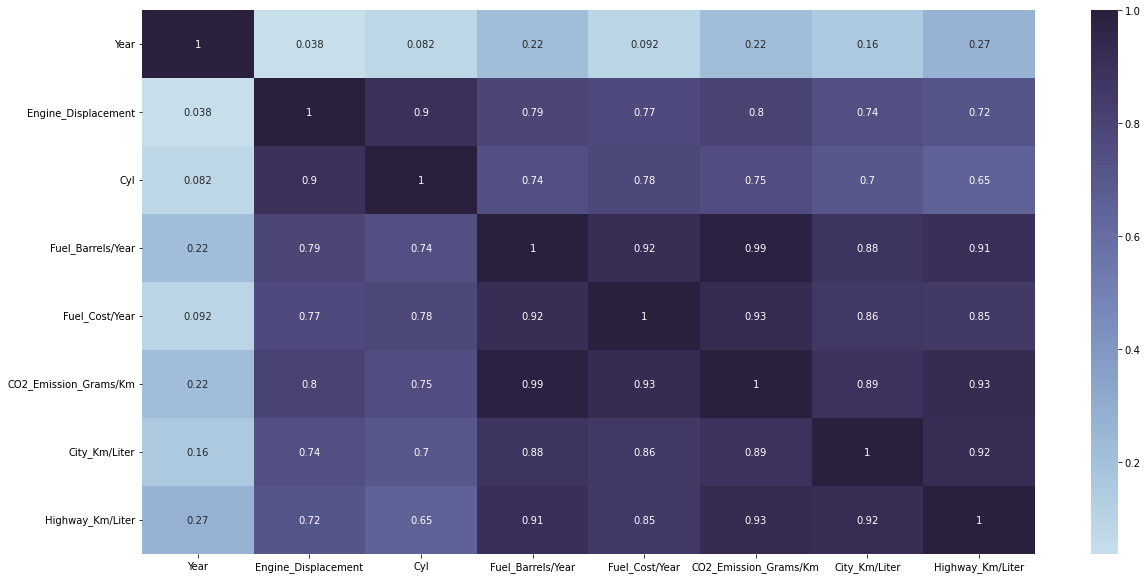

In [235]:
_, ax = plt.subplots(figsize=(20,10))
sns.heatmap(numbers, cmap=col, ax=ax, annot=True)


In [236]:
mask = np.zeros_like(numbers)
mask[np.triu_indices_from(mask)] = True


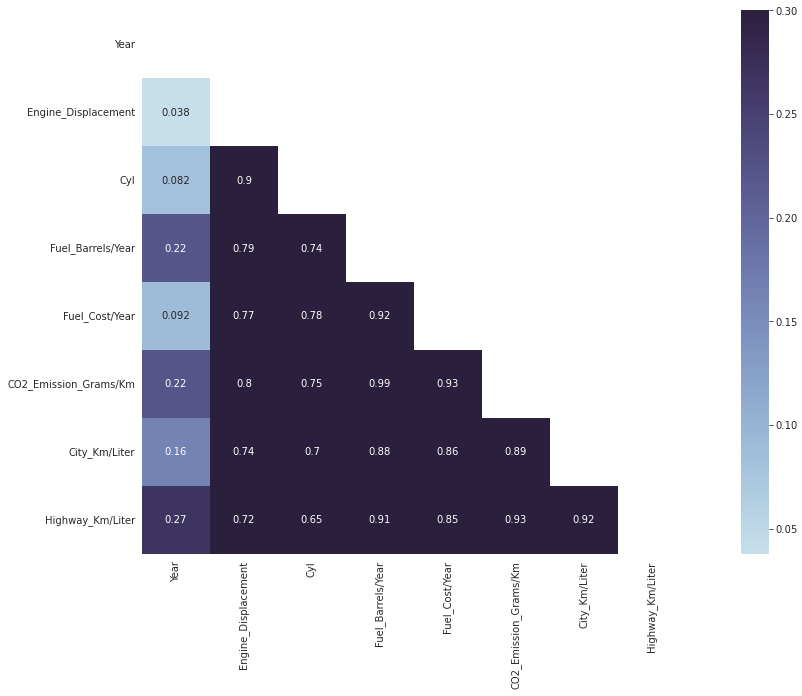

In [238]:

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 10))
    ax = sns.heatmap(numbers, mask=mask, vmax=.3, square=True, cmap=col, annot=True)


/opt/anaconda3/envs/DA_Enviroment/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


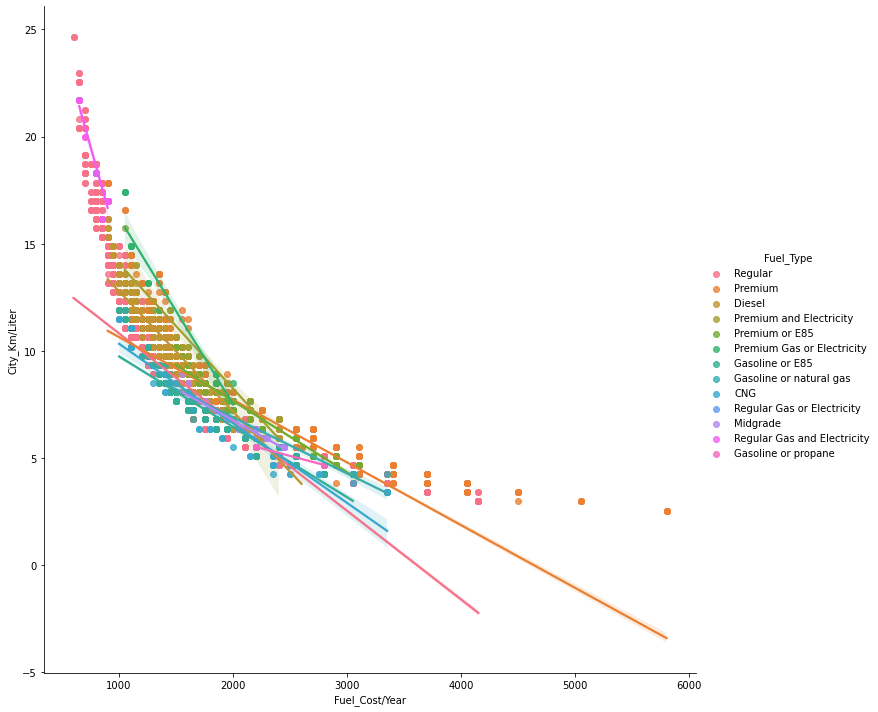

In [252]:
sns.lmplot(x='Fuel_Cost/Year', y='City_Km/Liter', hue='Fuel_Type', data=cars, size=10)

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Engine_Displacement', ylabel='Year'>,
        <AxesSubplot:xlabel='Cyl', ylabel='Year'>,
        <AxesSubplot:xlabel='Fuel_Barrels/Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Fuel_Cost/Year', ylabel='Year'>,
        <AxesSubplot:xlabel='CO2_Emission_Grams/Km', ylabel='Year'>,
        <AxesSubplot:xlabel='City_Km/Liter', ylabel='Year'>,
        <AxesSubplot:xlabel='Highway_Km/Liter', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Engine_Displacement'>,
        <AxesSubplot:xlabel='Engine_Displacement', ylabel='Engine_Displacement'>,
        <AxesSubplot:xlabel='Cyl', ylabel='Engine_Displacement'>,
        <AxesSubplot:xlabel='Fuel_Barrels/Year', ylabel='Engine_Displacement'>,
        <AxesSubplot:xlabel='Fuel_Cost/Year', ylabel='Engine_Displacement'>,
        <AxesSubplot:xlabel='CO2_Emission_Grams/Km', ylabel='Engine_Displacement'>,
        <AxesSubplot:xlabel='City_Km/Liter', ylabel=

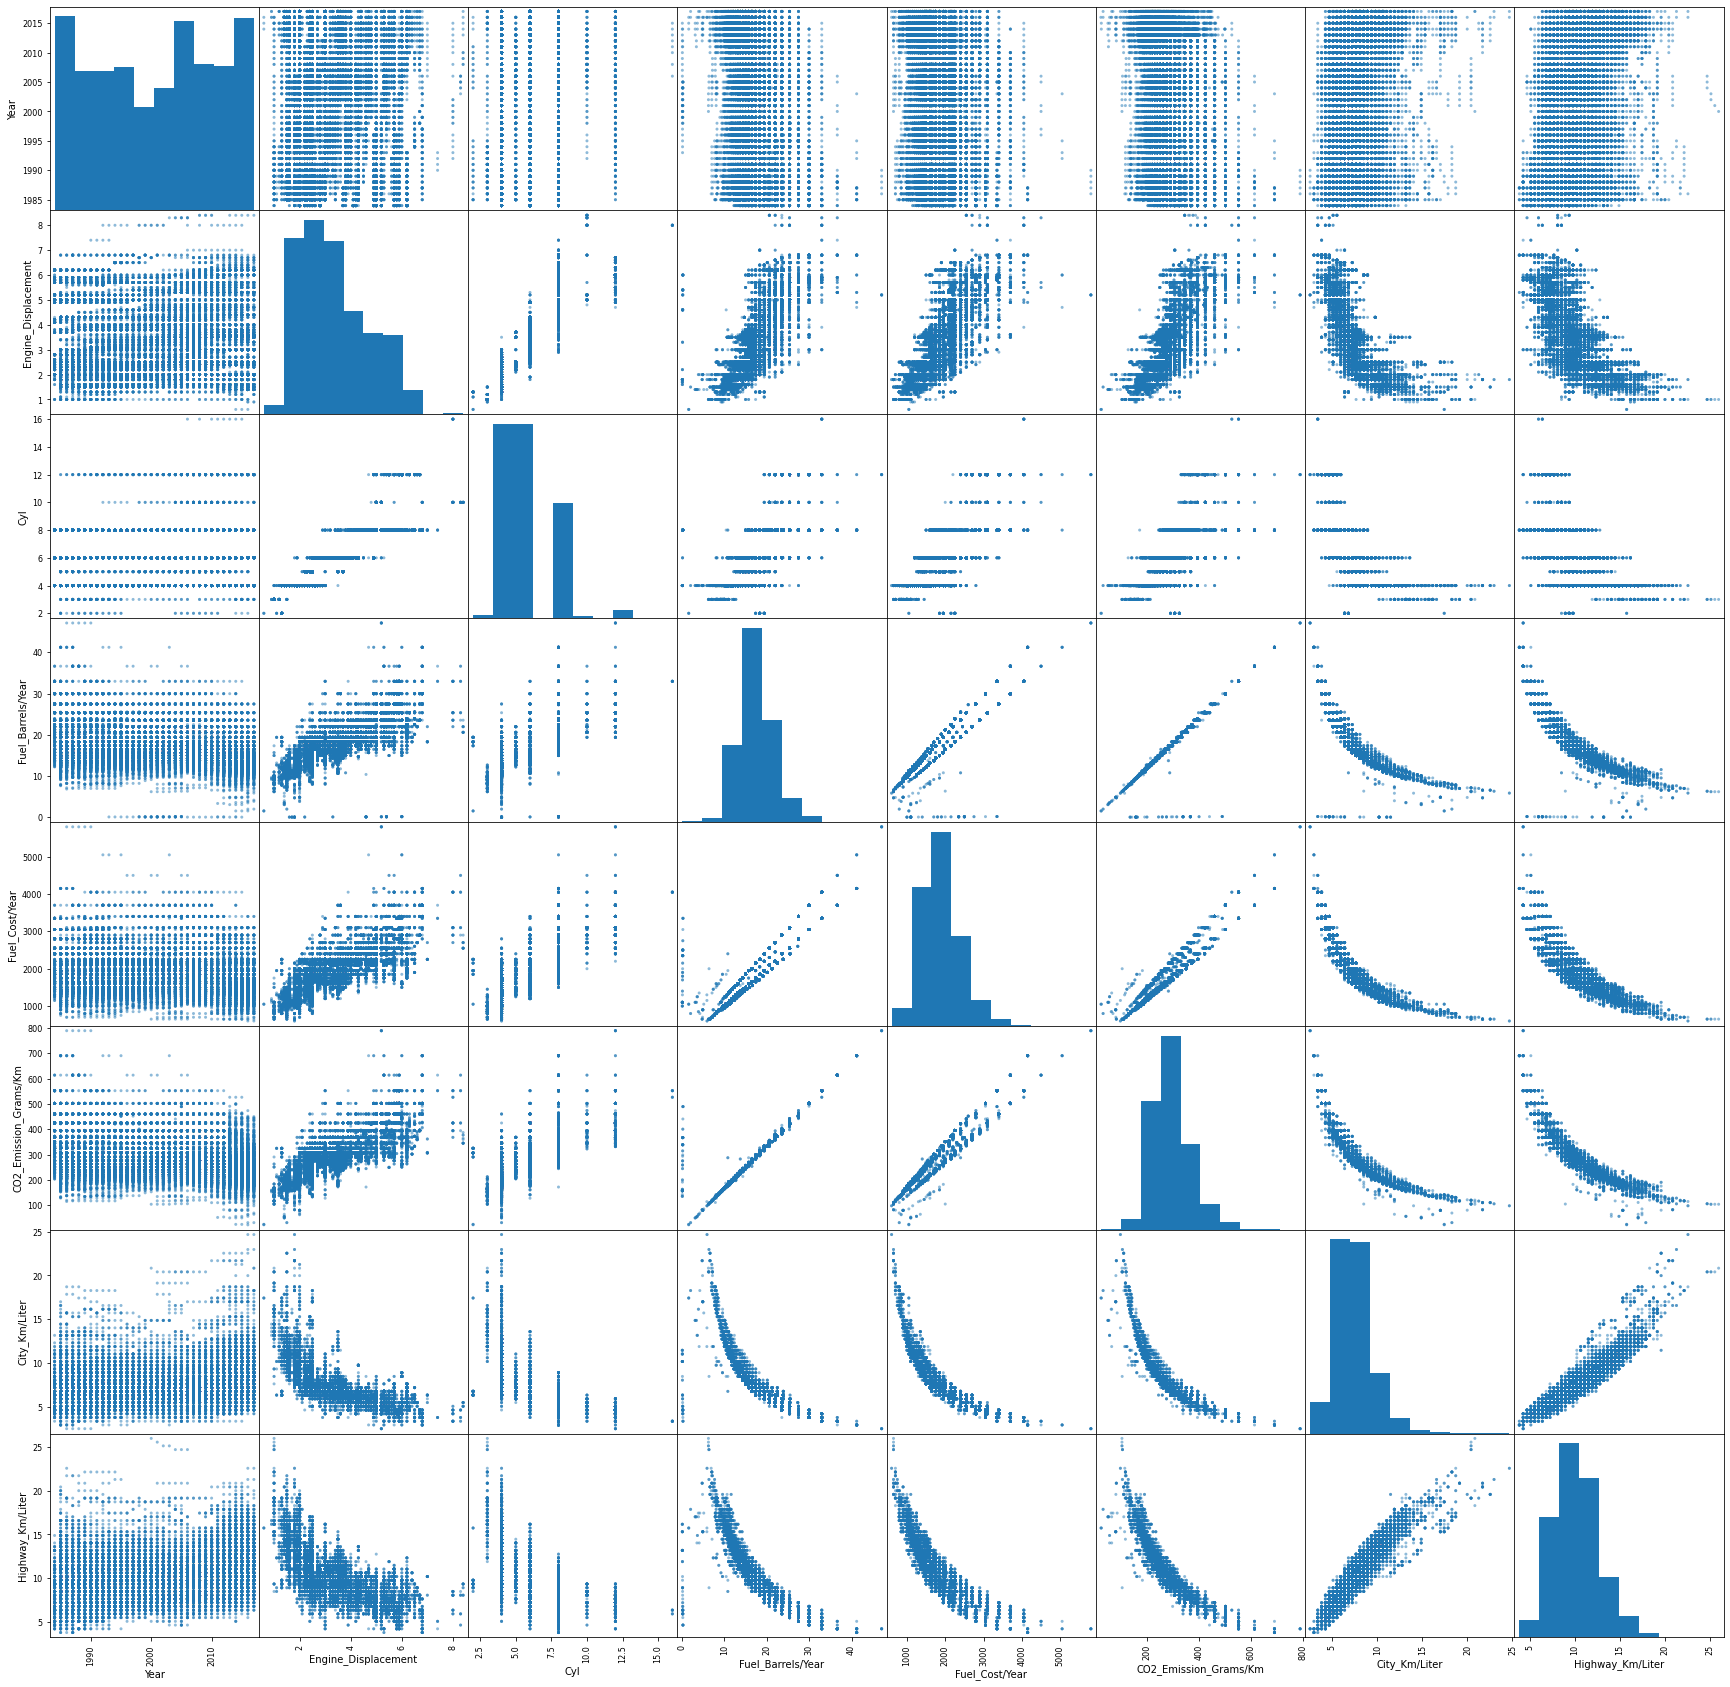

In [198]:
pd.plotting.scatter_matrix(cars, figsize=(30,30))